<a href="https://colab.research.google.com/github/kaustav1996/utility_data_analysis/blob/master/commercial_hourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#PRE CONFIGURE RUNTIME
# !pip install --upgrade Cython
# !pip install --upgrade git+https://github.com/statsmodels/statsmodels
# !pip install pmdarima


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-qhq9q9t5
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-qhq9q9t5
  Stored in directory: /tmp/pip-ephem-wheel-cache-kex5f23_/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.10.0rc2+22.g45a58b5a4
    Uninstalling statsmodels-0.10.0rc2+22.g45a58b5a4:
      Successfully uninstalled statsmodels-0.10.0rc2+22.g45a58b5a4


In [2]:
import os

model_errors=dict()

repo_url = 'https://github.com/kaustav1996/utility_data_analysis'

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}
!git pull

%ls

csv_file= os.path.abspath(os.path.join(repo_dir_path,'interval_data_commercial.csv'))

/content
fatal: destination path 'utility_data_analysis' already exists and is not an empty directory.
/content/utility_data_analysis
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/kaustav1996/utility_data_analysis
   df182cd..eb9be9a  master     -> origin/master
Updating df182cd..eb9be9a
Fast-forward
 analysis_on_csv_data_daily_basis.ipynb |   917 ++
 interval_data_commercial.csv           | 17897 +++++++++++++++++++++++++++++++
 2 files changed, 18814 insertions(+)
 create mode 100644 analysis_on_csv_data_daily_basis.ipynb
 create mode 100644 interval_data_commercial.csv
analysis_on_csv_data_daily_basis.ipynb  interval_data_commercial.csv  README.md
analysis_on_csv_data.ipynb              interval_data.csv
analysis_on_csv_data_monthly.ipynb      LICENSE


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv(csv_file)
df=df.fillna(df.mean())
#Printing head
df.head()


,TIME,KW
0,8/29/2018 0:15,0.0
1,8/29/2018 0:30,0.0
2,8/29/2018 0:45,0.0
3,8/29/2018 1:00,0.0
4,8/29/2018 1:15,0.0


In [4]:
df.tail()

,TIME,KW
17891,6/7/2019 3:00,6.25
17892,6/7/2019 3:15,6.25
17893,6/7/2019 3:30,6.25
17894,6/7/2019 3:45,6.25
17895,6/7/2019 4:00,6.25


In [11]:
testtest=df[15675:]
testtest.head()

,TIME,KW
15675,4/30/2019 23:00,0.58
15676,4/30/2019 23:15,0.58
15677,4/30/2019 23:30,0.00
15678,4/30/2019 23:45,0.00
15679,5/1/2019 0:00,0.00


In [12]:
train=df[:15679]
test=test=df[15679:]

df.Timestamp = pd.to_datetime(df['TIME'],format='%m/%d/%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('60T').mean()
train.Timestamp = pd.to_datetime(train['TIME'],format='%m/%d/%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('60T').mean()
test.Timestamp = pd.to_datetime(test['TIME'],format='%m/%d/%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('60T').mean()

# train['TIME']=train.index

print(train)

                           KW
TIME                         
2018-08-29 00:00:00  0.000000
2018-08-29 01:00:00  0.000000
2018-08-29 02:00:00  0.000000
2018-08-29 03:00:00  0.000000
2018-08-29 04:00:00  0.000000
2018-08-29 05:00:00  0.000000
2018-08-29 06:00:00  0.000000
2018-08-29 07:00:00  0.072500
2018-08-29 08:00:00  0.492500
2018-08-29 09:00:00  0.677500
2018-08-29 10:00:00  1.705000
2018-08-29 11:00:00  0.952500
2018-08-29 12:00:00  1.135000
2018-08-29 13:00:00  0.845000
2018-08-29 14:00:00  1.082500
2018-08-29 15:00:00  0.935000
2018-08-29 16:00:00  1.065000
2018-08-29 17:00:00  2.237500
2018-08-29 18:00:00  4.200000
2018-08-29 19:00:00  6.275000
2018-08-29 20:00:00  1.670000
2018-08-29 21:00:00  0.677500
2018-08-29 22:00:00  0.677500
2018-08-29 23:00:00  0.292500
2018-08-30 00:00:00  0.000000
2018-08-30 01:00:00  0.000000
2018-08-30 02:00:00  0.000000
2018-08-30 03:00:00  0.000000
2018-08-30 04:00:00  0.000000
2018-08-30 05:00:00  0.000000
...                       ...
2019-04-29

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


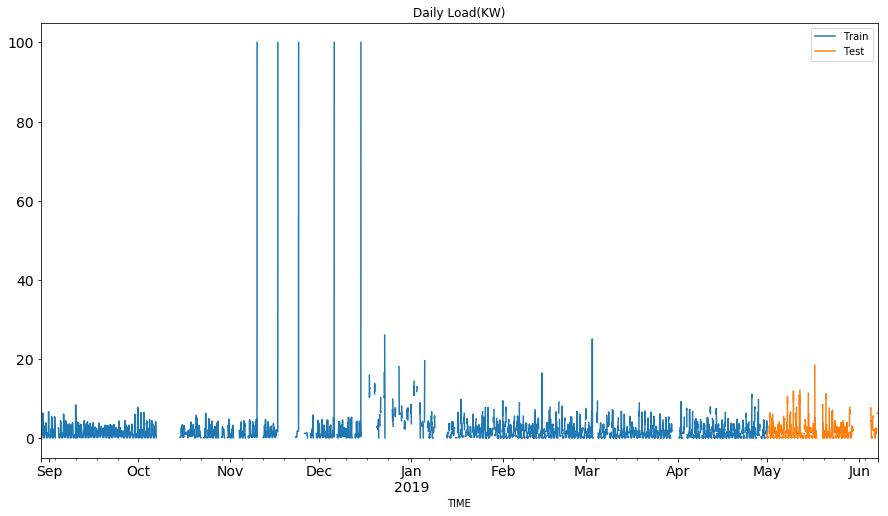

In [13]:
train.KW.plot(figsize=(15,8), title= 'Daily Load(KW)',label='Train' ,fontsize=14)
test.KW.plot(figsize=(15,8), title= 'Daily Load(KW)', label='Test', fontsize=14)
plt.legend(loc='best')
plt.show()


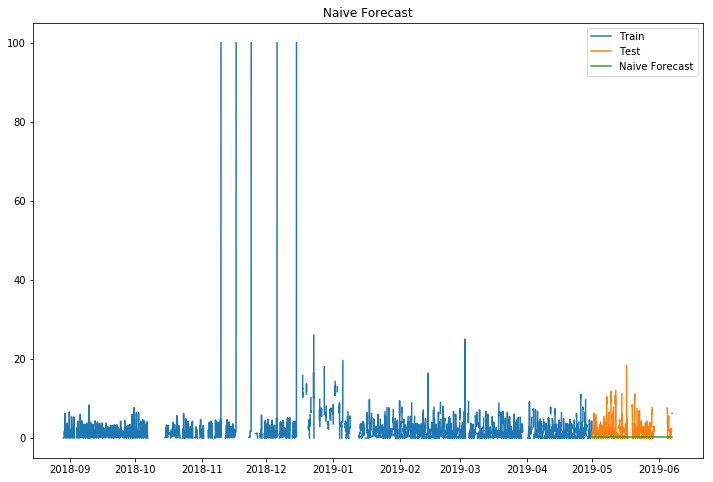

In [14]:
dd= np.asarray(train.KW)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['KW'], label='Train')
plt.plot(test.index,test['KW'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test = test.fillna(test.mean())
rms = sqrt(mean_squared_error(test.KW, y_hat.naive))
print(rms)

model_errors['Naive']=rms

2.225282433683661


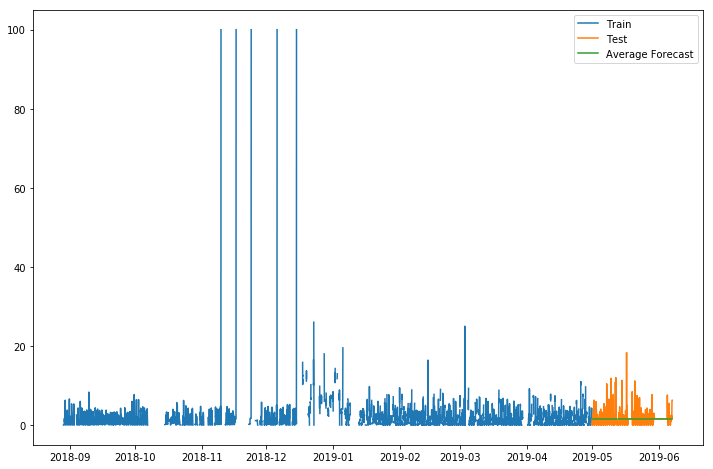

In [16]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['KW'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [17]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.avg_forecast))
print(rms)

model_errors['Average']=rms

1.826046536431146


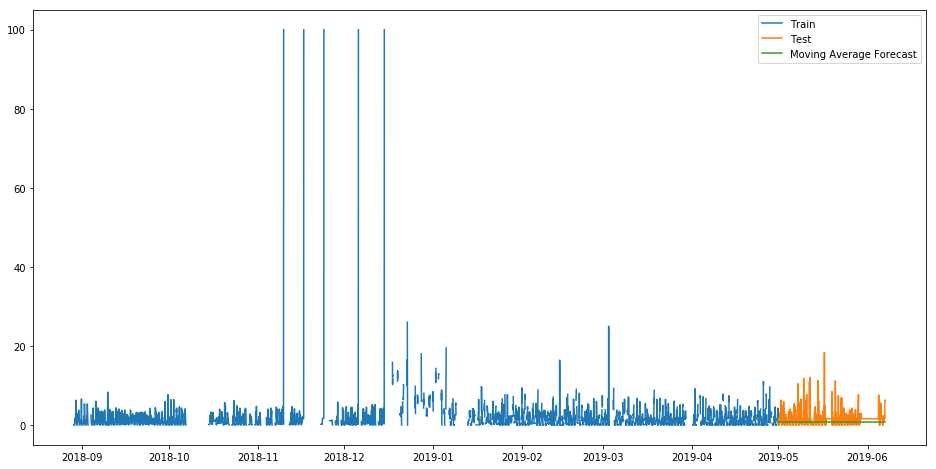

In [18]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['KW'].rolling(2).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [19]:
test = test.fillna(test.mean())
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.moving_avg_forecast))
print(rms)

model_errors['Moving Average']=rms

2.0157824100817945


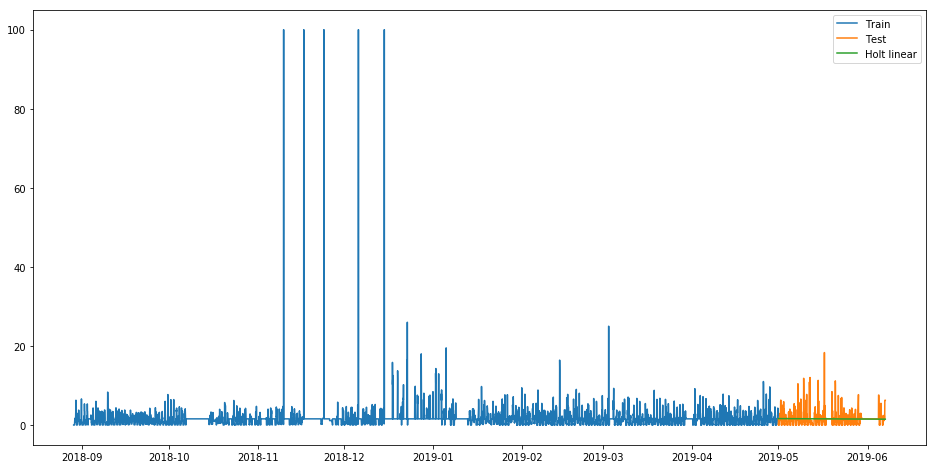

In [20]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

train = train.fillna(test.mean())

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['KW'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt linear')
plt.legend(loc='best')
plt.show()


In [21]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.Holt_linear))
print(rms)

model_errors['Holt Linear']=rms


1.8280478265108002


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:710: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


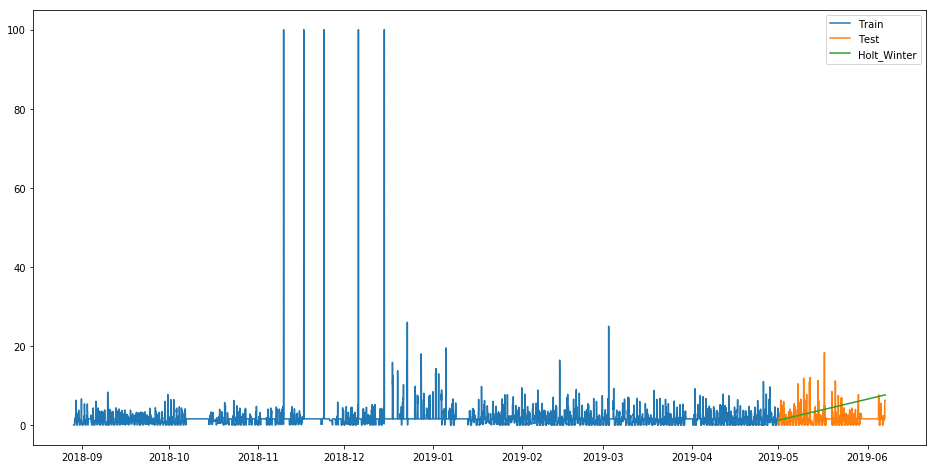

In [22]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['KW']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [28]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.Holt_Winter))
print(rms)

model_errors['Holt Winter']=rms


3.8140039007307855


In [24]:
import pmdarima as pm
import datetime

arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      seasonal=False)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(2, 1, 2); AIC=30528.644, BIC=30568.719, Fit time=2.763 seconds
Fit ARIMA: order=(0, 1, 0); AIC=33915.507, BIC=33928.866, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=32441.515, BIC=32461.552, Fit time=0.038 seconds
Fit ARIMA: order=(0, 1, 1); AIC=30637.097, BIC=30657.134, Fit time=0.559 seconds
Fit ARIMA: order=(1, 1, 2); AIC=30526.560, BIC=30559.956, Fit time=2.437 seconds
Fit ARIMA: order=(1, 1, 1); AIC=30550.399, BIC=30577.116, Fit time=1.410 seconds
Fit ARIMA: order=(1, 1, 3); AIC=30528.546, BIC=30568.621, Fit time=3.659 seconds
Fit ARIMA: order=(2, 1, 3); AIC=30530.259, BIC=30577.013, Fit time=4.782 seconds
Fit ARIMA: order=(0, 1, 2); AIC=30560.314, BIC=30587.031, Fit time=1.106 seconds
Total fit time: 16.764 seconds


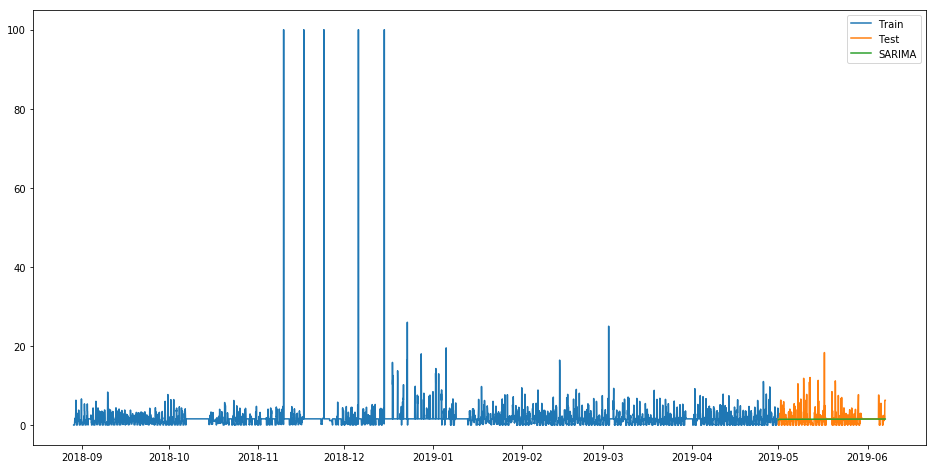

In [25]:
predicted_val=arima.predict(n_periods=test.shape[0])
predicted_df = test.copy()


for i in range(len(predicted_df)):
    predicted_df['KW'][i]=predicted_val[i]


plt.figure(figsize=(16,8))
plt.plot( train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(predicted_df, label='SARIMA')
plt.legend(loc='best')
plt.show()

In [26]:
rms = sqrt(mean_squared_error(test.KW, predicted_df.KW))
print(rms)

model_errors['SARIMA']=rms

1.8258450805396444


In [29]:
for index in model_errors:
    print(index+' : '+str(model_errors[index]))

Naive : 2.225282433683661
Average : 1.826046536431146
Moving Average : 2.0157824100817945
Holt Linear : 1.8280478265108002
SARIMA : 1.8258450805396444
Holt Winter : 3.8140039007307855
